In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# check missing value counts

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
df2 = df.copy()

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()
X = df2.drop("target",axis=1)
y = df2["target"]


# Fit and transform, then convert back to DataFrame with original column names
Xs = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)



In [12]:
Xs.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667


In [14]:
X_train,X_test,y_train,y_test = train_test_split(Xs,y,test_size=0.2,shuffle=True)

## Fit the decision tree model

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

In [16]:
clf = DecisionTreeClassifier(random_state=42)

In [17]:
# fit the model
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       101
           1       0.97      1.00      0.99       104

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [29]:
train_acc = clf.score(X_train, y_train)
test_acc = clf.score(X_test, y_test)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)


Train Accuracy: 1.0
Test Accuracy: 0.9853658536585366


### There is overfitting in the model

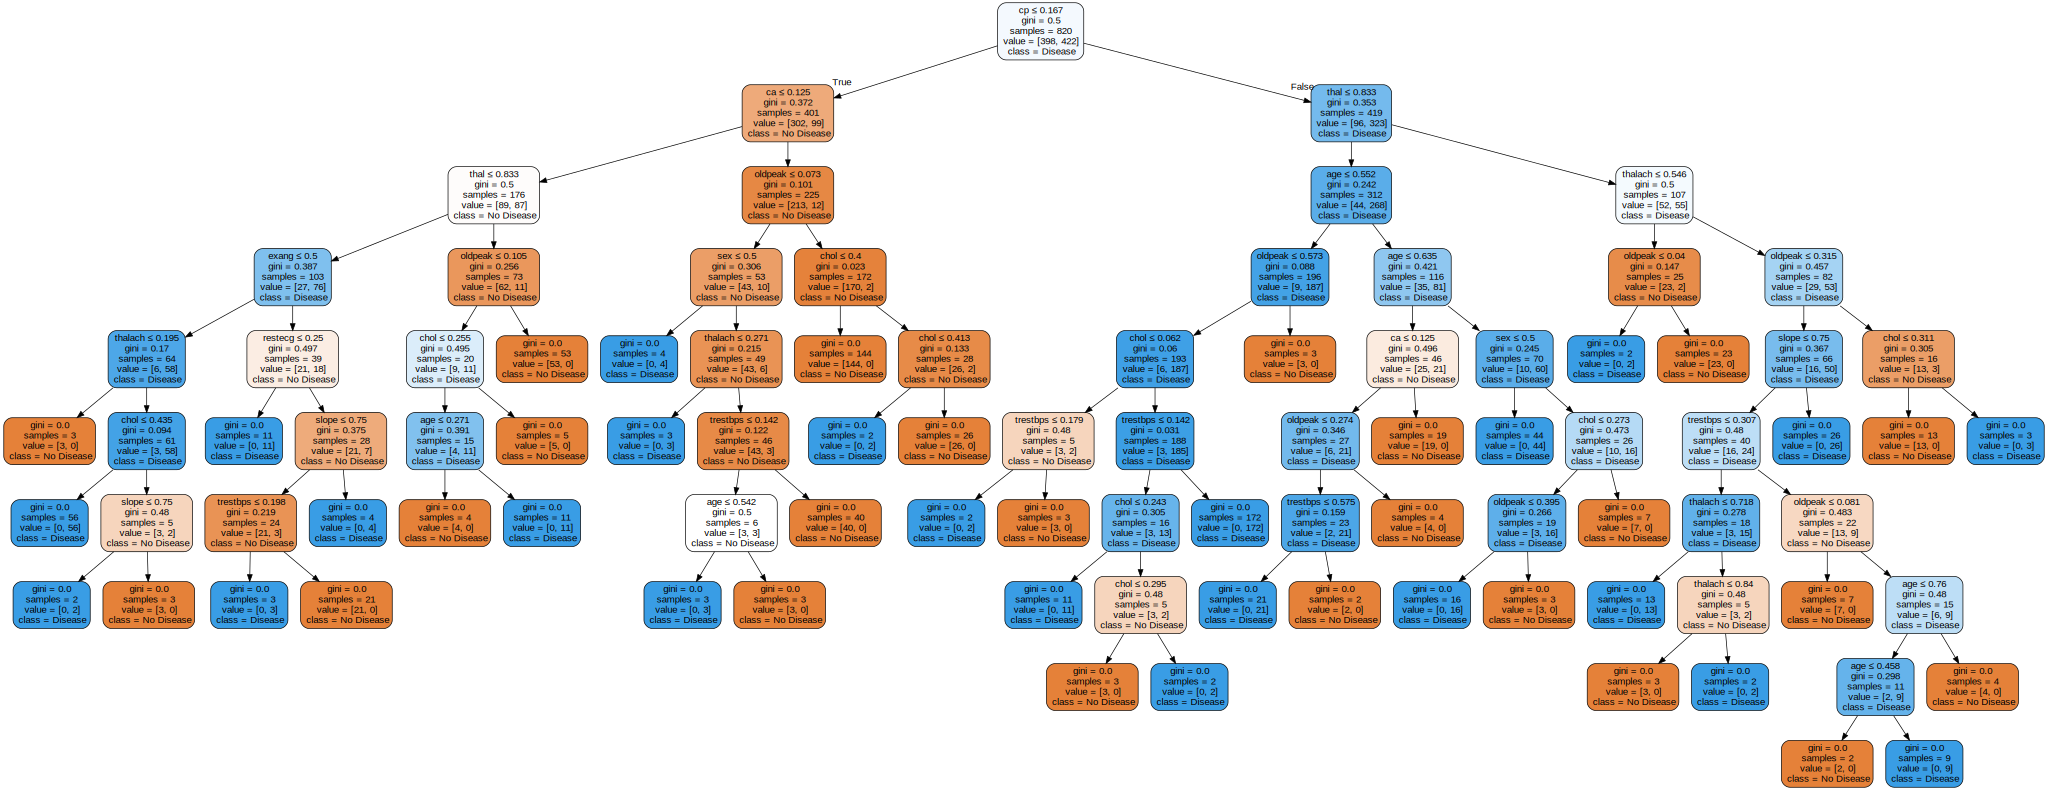

In [35]:
from sklearn.tree import export_graphviz
import graphviz

# Export tree as DOT format
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True,
    special_characters=True
)

# Render the DOT file to a graph
graph = graphviz.Source(dot_data)
graph.render("heart_tree")  # Saves as heart_tree.pdf

# Display inline in notebook
graph# This opens the tree PDF


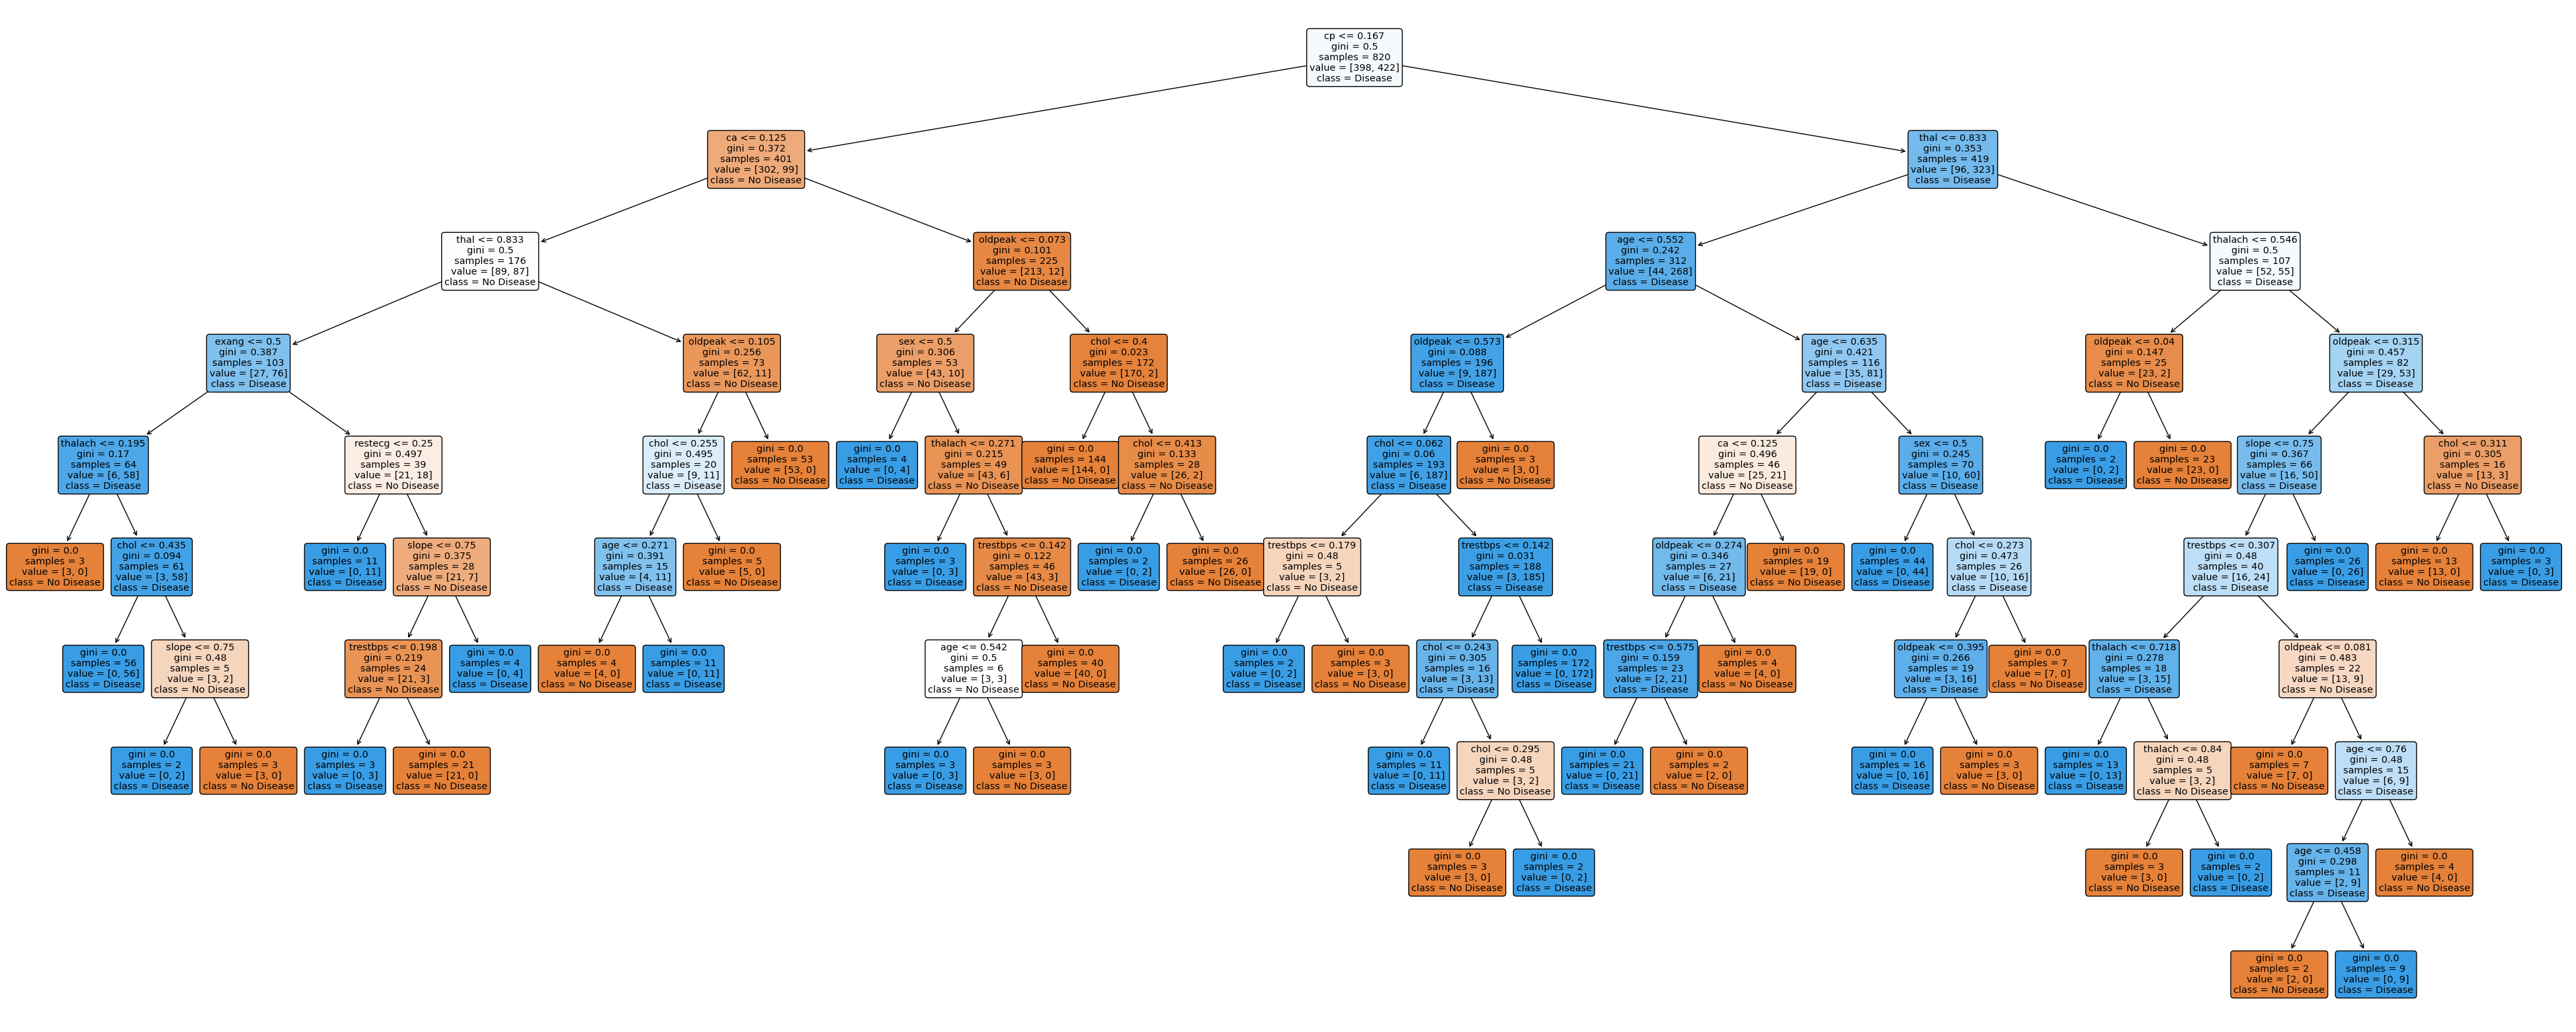

In [28]:
from sklearn.tree import plot_tree

plt.figure(figsize=(50,20))

plot_tree(clf,
         feature_names=Xs.columns,
         class_names = ["No Disease","Disease"],
         filled=True,rounded=True)

plt.show()

## Control the depth to see performance

In [37]:
from sklearn.metrics import f1_score
depths = range(1, 20)
train_scores = []
test_scores = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    train_scores.append(f1_score(y_train,clf.predict(X_train)))
    test_scores.append(f1_score(y_test,clf.predict(X_test)))



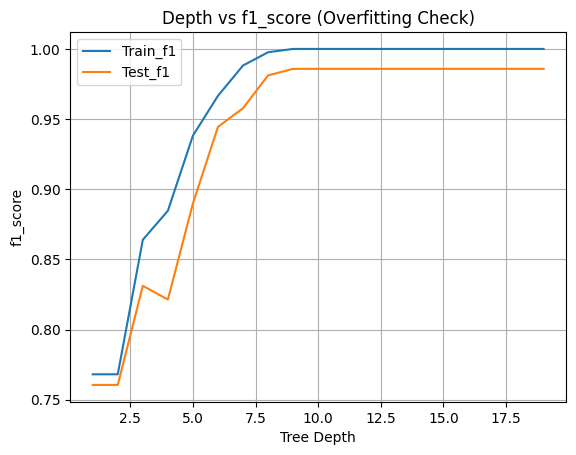

In [39]:
# Plotting
plt.plot(depths, train_scores, label='Train_f1')
plt.plot(depths, test_scores, label='Test_f1')
plt.xlabel('Tree Depth')
plt.ylabel('f1_score')
plt.legend()
plt.title('Depth vs f1_score (Overfitting Check)')
plt.grid(True)
plt.show()


We can see that from 2.5 depth to around 4 ,train metric is increasing and test_metric is decreasing which implies overfitting

Since this is a heart disease classification problem,we want to maximize the recall because we dont want any false negative that is a patient has
heart disease but the model says otherwise

In [55]:
from sklearn.metrics import recall_score
depths = range(1, 20)
train_scores = []
test_scores = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    train_scores.append(recall_score(y_train,clf.predict(X_train)))
    test_scores.append(recall_score(y_test,clf.predict(X_test)))

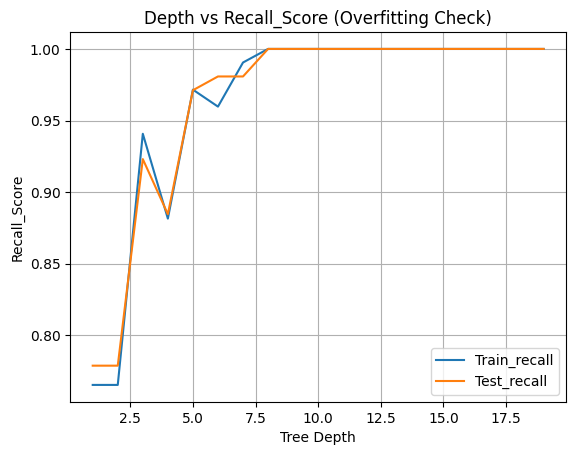

In [56]:
plt.plot(depths, train_scores, label='Train_recall')
plt.plot(depths, test_scores, label='Test_recall')
plt.xlabel('Tree Depth')
plt.ylabel('Recall_Score')
plt.legend()
plt.title('Depth vs Recall_Score (Overfitting Check)')
plt.grid(True)
plt.show()

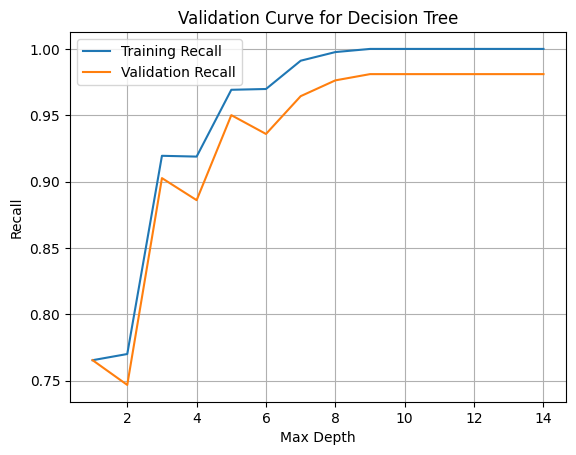

In [66]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import numpy as np

depths = np.arange(1, 15)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(random_state=42),
    X_train, y_train,
    param_name="max_depth",
    param_range=depths,
    scoring="recall",
    cv=5
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(depths, train_mean, label='Training Recall')
plt.plot(depths, test_mean, label='Validation Recall')
plt.xlabel('Max Depth')
plt.ylabel('Recall')
plt.title('Validation Curve for Decision Tree')
plt.legend()
plt.grid(True)
plt.show()

### Best recall is occuring around depth 9

In [53]:
from sklearn.model_selection import cross_val_score

cv = cross_val_score(clf, Xs, y, cv=5, scoring='recall')

print("recall scores for each fold:", cv)
print("Mean recall score:", cv.mean())


recall scores for each fold: [1. 1. 1. 1. 1.]
Mean recall score: 1.0


In [54]:
# use gridsearch cv
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': range(1, 21)  # Trying depths from 1 to 20
}
clf = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='recall',
    return_train_score=True
)

grid_search.fit(X, y)

print("Best max_depth:", grid_search.best_params_['max_depth'])
print("Best cross-validation accuracy:", grid_search.best_score_)



Best max_depth: 9
Best cross-validation accuracy: 1.0


## Pruning

Pruning is a technique in DT ,which is done inorder to reduce overfitting of the tree.
It is essentially cutting of the branches of the tree.
We are doing post-pruning,we are training the tree first then cutting off the branches.

In [60]:
# Train an unpruned tree first
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Get different alphas and corresponding impurities
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train trees for each alpha
clfs = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)


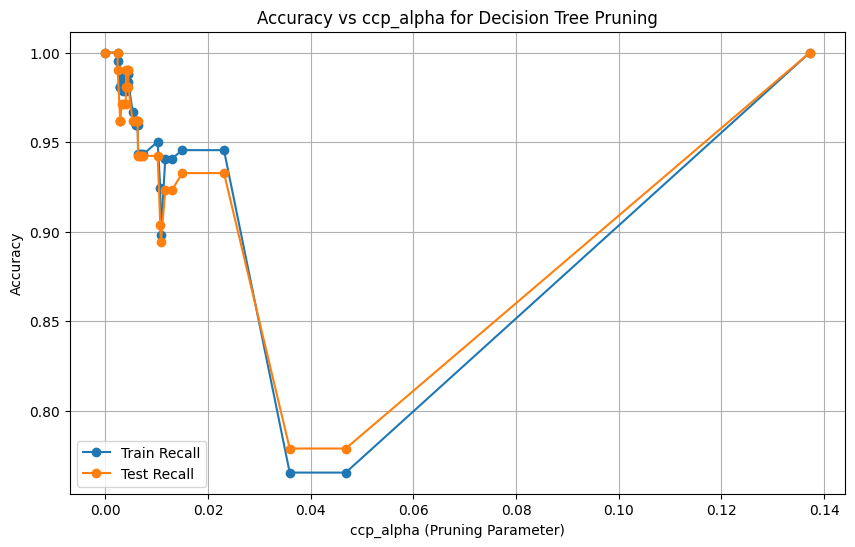

In [63]:

train_scores = [recall_score(y_train,clf.predict(X_train)) for clf in clfs]
test_scores = [recall_score(y_test,clf.predict(X_test)) for clf in clfs]

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Recall')
plt.plot(ccp_alphas, test_scores, marker='o', label='Test Recall')
plt.xlabel("ccp_alpha (Pruning Parameter)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs ccp_alpha for Decision Tree Pruning")
plt.legend()
plt.grid(True)
plt.show()


### It looks like alpha value b/w o.12 to 0.14 is the best for post-pruning

## Train RandomForestClassifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)

rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [43]:
train_acc = rfc.score(X_train, y_train)
test_acc = rfc.score(X_test, y_test)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)


Train Accuracy: 1.0
Test Accuracy: 0.9853658536585366


In [48]:
rfc.feature_importances_

array([0.09028828, 0.02891732, 0.14271233, 0.07178067, 0.08042466,
       0.01046403, 0.01823586, 0.12533429, 0.06498207, 0.11032304,
       0.04226264, 0.11298833, 0.10128648])

In [49]:
# Create a DataFrame for better readability
feature_importances = pd.Series(rfc.feature_importances_, index=X_train.columns)

# Sort and print
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances)


cp          0.142712
thalach     0.125334
ca          0.112988
oldpeak     0.110323
thal        0.101286
age         0.090288
chol        0.080425
trestbps    0.071781
exang       0.064982
slope       0.042263
sex         0.028917
restecg     0.018236
fbs         0.010464
dtype: float64


<Axes: >

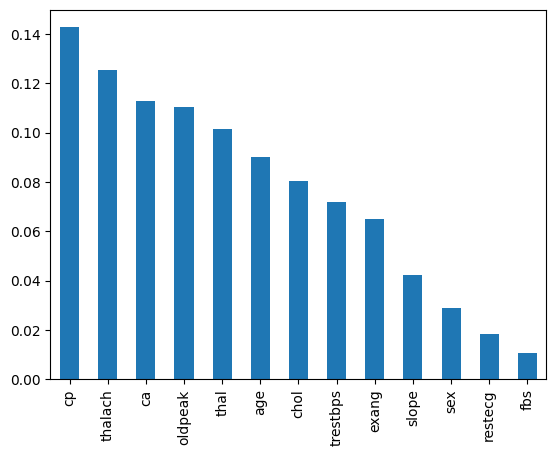

In [51]:
feature_importances.plot.bar()

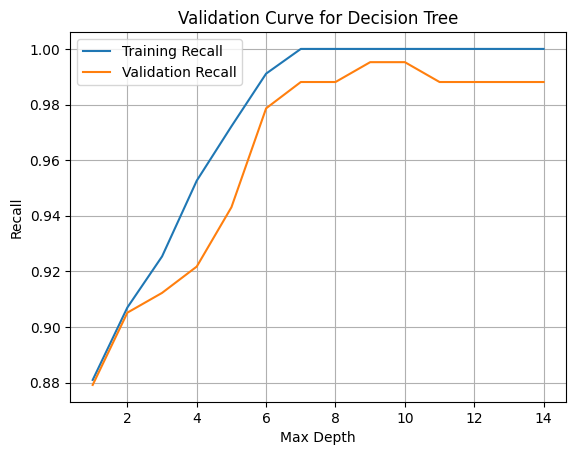

In [65]:
depths = np.arange(1, 15)
train_scores, test_scores = validation_curve(
    RandomForestClassifier(random_state=42),
    X_train, y_train,
    param_name="max_depth",
    param_range=depths,
    scoring="recall",
    cv=5
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(depths, train_mean, label='Training Recall')
plt.plot(depths, test_mean, label='Validation Recall')
plt.xlabel('Max Depth')
plt.ylabel('Recall')
plt.title('Validation Curve for Decision Tree')
plt.legend()
plt.grid(True)
plt.show()

### From the above validation-curve ,we can see that the best recall is coming around 10

In [69]:
rfc = RandomForestClassifier(max_depth=10)

In [70]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [71]:
feature_importances = pd.Series(rfc.feature_importances_, index=X_train.columns)

# Sort and print
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances)


cp          0.149591
ca          0.127568
oldpeak     0.119623
thalach     0.114282
thal        0.104706
age         0.084295
chol        0.076922
trestbps    0.067736
exang       0.050487
slope       0.046999
sex         0.030740
restecg     0.016783
fbs         0.010268
dtype: float64


<Axes: >

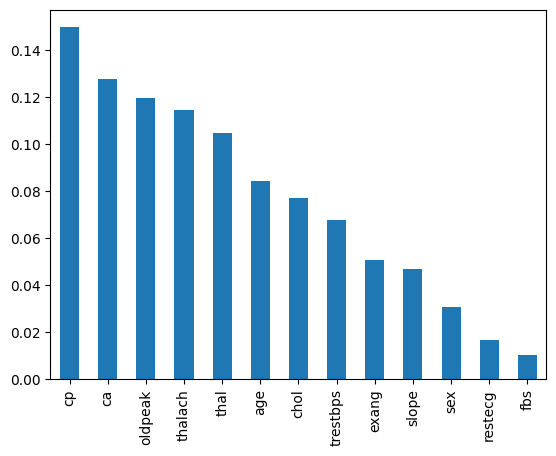

In [72]:
feature_importances.plot.bar()

### We can see cp plays most imporatant role in predicting the heart disease and fbs plays the least role

### Use cross-validation

In [75]:
cross_val_score(rfc,Xs,y,cv=5,scoring="recall")

array([1., 1., 1., 1., 1.])